In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pyreadstat

In [38]:
__PATH_to_FILE__ = "YOUR PATH HERE"

In [56]:
def read_large_pandas_df(file_name):
    my_list = []
    for chunk in pd.read_csv(file_name, chunksize=100):
        my_list.append(chunk)
    df = pd.concat(my_list, axis=0)
    del my_list
    
    return df

def del_certain_columns_pandas_df(df, col_list):
    df = df.drop(col_list, axis = 1)
    return df

def del_rows_w_certain_values(df):
    for col in df.columns[1:]:
        df = df[df[col]>0]
    return df

# PREPARE DATASET

In [104]:
df_householdeul2017_short = read_large_pandas_df("householdeul2017_short.csv")

In [105]:
cols_to_stay = ["HouseholdID", 'SurveyYear', "TWSWeek", "HHIncome2002_B02ID", "HHIncOrig_B01ID", "HHoldCountry_B01ID", "HHoldNumAdults", 
"HHoldNumChildren", "NumVehicles", "StationKmTRACC", "WalkRailAlt_B01ID", "HRPWorkStat_B02ID", "HRPSEGWorkStat_B01ID", "BusStandard_B01ID"]
columns_to_delete = [i for i in df_householdeul2017_short.columns if i not in cols_to_stay]
df_householdeul2017_short = del_certain_columns_pandas_df(df_householdeul2017_short , columns_to_delete)

In [106]:
df_householdeul2017_short["NumVehicles"] = df_householdeul2017_short["NumVehicles"].replace(" ", -10).astype('float32')
df_householdeul2017_short["HHIncome2002_B02ID"] = df_householdeul2017_short["HHIncome2002_B02ID"].replace(" ", -10).astype('float32')

In [65]:
df_householdeul2017_short.shape

(135794, 14)

In [101]:
col_int = list(filter(lambda x: x not in ['HouseholdID', 'SurveyYear'], df_householdeul2017_short.columns.tolist()))

In [102]:
df_householdeul2017_short = df_householdeul2017_short[(df_householdeul2017_short[col_int] > 0).all(axis=1)]

In [108]:
df_householdeul2017_short.shape

(135794, 14)

In [109]:
df_householdeul2017_short.to_csv("Households_variables_processed.csv", index=False)

# Households Processing

In [110]:
df_householdeul2017_short.columns

Index(['HouseholdID', 'SurveyYear', 'TWSWeek', 'HHIncome2002_B02ID',
       'HHIncOrig_B01ID', 'HHoldCountry_B01ID', 'HHoldNumAdults',
       'HHoldNumChildren', 'NumVehicles', 'StationKmTRACC',
       'WalkRailAlt_B01ID', 'HRPWorkStat_B02ID', 'HRPSEGWorkStat_B01ID',
       'BusStandard_B01ID'],
      dtype='object')

In [113]:
df_householdeul2017_short["Total_people"] = df_householdeul2017_short["HHoldNumAdults"] + df_householdeul2017_short["HHoldNumChildren"]

In [117]:
df_householdeul2017_short["Income_dollars"] = df_householdeul2017_short["HHIncome2002_B02ID"].map({2.0: 50000, 3.0: 75000, 1.0: 25000})

In [120]:
df_householdeul2017_short.head()

,HouseholdID,SurveyYear,TWSWeek,HHIncome2002_B02ID,HHIncOrig_B01ID,HHoldCountry_B01ID,HHoldNumAdults,HHoldNumChildren,NumVehicles,StationKmTRACC,WalkRailAlt_B01ID,HRPWorkStat_B02ID,HRPSEGWorkStat_B01ID,BusStandard_B01ID,Total_people,Income_per_person,Income_dollars
0,2002000001,2002,4,2.0,1,1,2,2,2.0,-10.0,-9,1,3,1,4,12500.0,50000.0
1,2002000002,2002,3,1.0,1,1,1,0,0.0,-10.0,-9,3,5,1,1,25000.0,25000.0
2,2002000003,2002,3,3.0,1,1,3,0,2.0,-10.0,-9,1,3,1,3,25000.0,75000.0
3,2002000004,2002,5,3.0,1,1,2,0,2.0,-10.0,-9,1,3,1,2,37500.0,75000.0
4,2002000005,2002,3,3.0,1,1,3,0,3.0,-10.0,-9,1,1,1,3,25000.0,75000.0


In [119]:
df_householdeul2017_short["Income_per_person"] = df_householdeul2017_short["Income_dollars"]/df_householdeul2017_short['Total_people']

c:\users\marianna.petrova\appdata\local\programs\python\python36-32\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\marianna.petrova\appdata\local\programs\python\python36-32\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([16444., 43635.,  6702., 51821.,  9438.,     0.,  6044.,     0.,
            0.,  1709.]),
 array([ 2500.,  9750., 17000., 24250., 31500., 38750., 46000., 53250.,
        60500., 67750., 75000.]),
 <a list of 10 Patch objects>)

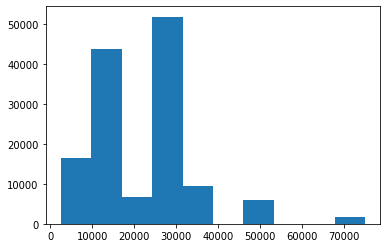

In [121]:
plt.hist(df_householdeul2017_short["Income_per_person"])

In [130]:
low_income_hh = df_householdeul2017_short[df_householdeul2017_short["Income_per_person"]<10000]

In [132]:
low_income_hh.to_csv('LowIncomeID.csv', index=False)